## Data Science Blog Post - Missing Migrants

In [1]:
#import necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In this project, CRISP-DM methodology will be followed with the below specified steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

#### Business Understanding

In this step, main focus is to understand the project objectives and requirements from a business perspective. Then, this understanding and knowledge will be converted into a data mining problem definition and defines a study plan. 

In this research, I will focus on the questions which are stated in below:

1. Distribution of total dead and missing number of migrants among the years to understand the conditions.
2. Region of Incident to understand the route and road conditions
3. Top causes of death to investigate the migrants death reasoning.




#### Data Understanding

Data Understanding process starts with data collection and then proceeds with performing analysis to identify data quality, to discover first insights into data, or to detect interesting subsets to form hypothesis for hidden informations.

In [2]:
# Read the data
Missing_Migrants = pd.read_csv('MissingMigrants-Global-2019-03-29T18-36-07.csv')
Missing_Migrants.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [3]:
# Print the number of columns and rows
number_rows = Missing_Migrants.shape[0] 
number_cols = Missing_Migrants.shape[1] 
print("Row    number: {}".format(number_rows))
print("Column number: {}".format(number_cols))

Row    number: 5333
Column number: 20


In [4]:
# Use describe to get first insight about the data columns and rows.
Missing_Migrants.describe()

,Web ID,Reported Year,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,5333.000000,5333.000000,5142.000000,503.000000,5333.000000,749.000000,897.000000,2813.000000,644.000000,5333.000000
mean,43247.885805,2016.656104,3.287631,29.119284,5.916370,63.607477,2.012263,1.890864,2.476708,2.895556
std,5186.837212,1.237033,13.593407,67.913216,28.051811,146.520155,2.990100,5.510674,10.216220,1.423257
min,30158.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40876.000000,2016.000000,1.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.000000
50%,43504.000000,2017.000000,1.000000,7.000000,1.000000,15.000000,1.000000,1.000000,1.000000,2.000000
75%,45747.000000,2018.000000,2.000000,25.000000,3.000000,61.000000,2.000000,1.000000,2.000000,4.000000
max,51592.000000,2019.000000,750.000000,750.000000,1022.000000,1950.000000,30.000000,135.000000,250.000000,5.000000


In [5]:
# Dataset Column data informations
Missing_Migrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 20 columns):
Web ID                                 5333 non-null int64
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5142 non-null float64
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null o

In [6]:
Missing_Migrants.dtypes

Web ID                                   int64
Region of Incident                      object
Reported Date                           object
Reported Year                            int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Dead and Missing                   int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location Description                    object
Information Source                      object
Location Coordinates                    object
Migration Route                         object
URL                                     object
UNSD Geographical Grouping              object
Source Quality                           int64
dtype: object

In [7]:
# Get the column names of dataset to use in the analysis process.
Missing_Migrants.columns

Index(['Web ID', 'Region of Incident', 'Reported Date', 'Reported Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Dead and Missing', 'Number of Survivors', 'Number of Females',
       'Number of Males', 'Number of Children', 'Cause of Death',
       'Location Description', 'Information Source', 'Location Coordinates',
       'Migration Route', 'URL', 'UNSD Geographical Grouping',
       'Source Quality'],
      dtype='object')

#### Data Preparation

Data prepation is defined as all activities to construct the final dataset from the initial dataset. Some data preparation steps need to be done before using the dataset for exploration, including：

- Drop unused columns
- Checking columns with missing values and analyze impact
- Dealing with missing values
- One-Hot Encoding for Categorical variables if needed

First, I will drop the unused columns in the dataset in the analyzing process.

In [8]:
# Data Preparation Step 1: Drop the columns which will not be used in this project
Missing_Migrants.drop('Web ID',              axis = 1,inplace=True)
Missing_Migrants.drop('Reported Date',       axis = 1,inplace=True)
Missing_Migrants.drop('Information Source',  axis = 1,inplace=True)
Missing_Migrants.drop('Location Coordinates',axis = 1,inplace=True)
Missing_Migrants.drop('URL',                 axis = 1,inplace=True)
Missing_Migrants.drop('Location Description',axis = 1,inplace=True)
Missing_Migrants.drop('Source Quality',      axis = 1,inplace=True)
Missing_Migrants.head(5)

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration Route,UNSD Geographical Grouping
0,Mediterranean,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,Eastern Mediterranean,Uncategorized
1,Mediterranean,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,Eastern Mediterranean,Uncategorized
2,Mediterranean,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,Western Mediterranean,Uncategorized
3,Mediterranean,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,Western Mediterranean,Uncategorized
4,Central America,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,NaN,Central America


Second and third step in the data preparation are about the missing values and replacing them with NaN values. Since, the selected dataset is clean in the point of missing values, it is not needed to perform conversion.

Last step is dealing with categorical variables if needed. However, it is not needed to deal/convert the categorical variables.

#### Distribution of total dead and missing number of migrants among the years

Total dead and missing people among the years can be a good identifier for understanding governments policy change by the years. 

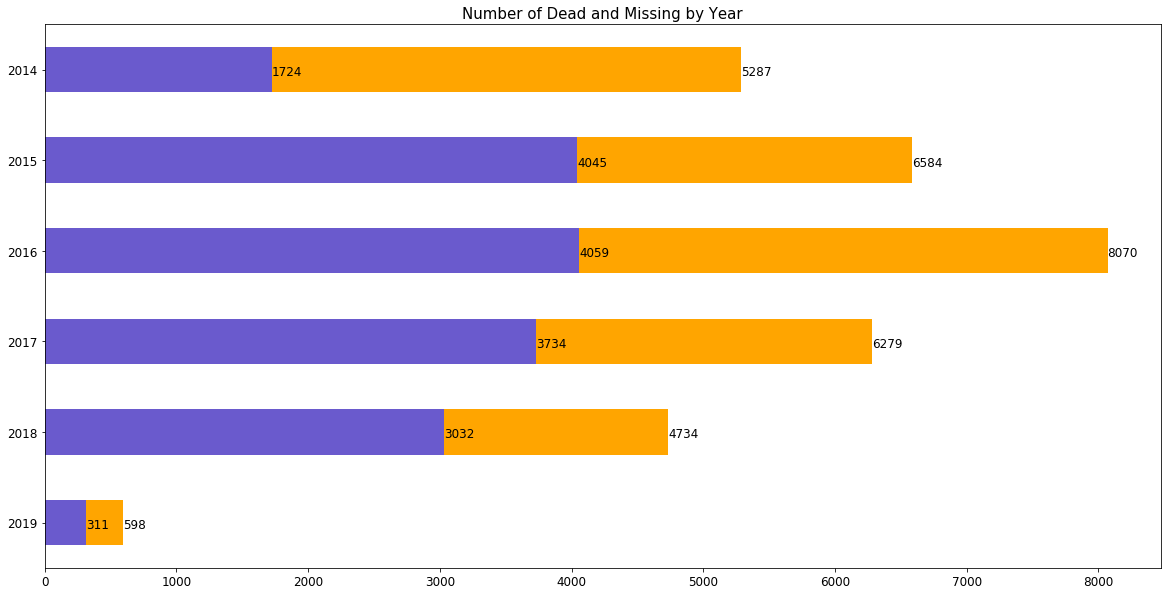

In [9]:
# Number of Dead and Missing Number of Migrants by Year Count
total_losses = Missing_Migrants.groupby(['Reported Year'])['Total Dead and Missing'].sum()
total_deads = Missing_Migrants.groupby(['Reported Year'])['Number Dead'].sum().astype(int)
#total_deads = pd.options.display.float_format = '{:,.0f}'.format

ax = total_losses.plot(kind='barh', figsize=(20, 10) ,color="orange", fontsize=12);
ax = total_deads.plot(kind='barh', figsize=(20, 10) ,color="slateblue", fontsize=12);
ax.set_alpha(0.8)
ax.set_title("Number of Dead and Missing by Year", fontsize=15)
#ax.set_xticks([0, 5])
plt.ylabel('');
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
    

# invert for largest on top 
ax.invert_yaxis()

In the above plot, the total missing and dead migrants are represented with orange and stateblue colors and the total count for each year is located at the right side of orange block. It is seen that there is a significant increase in dead migrants count at the year 2015 and also the total missing and dead migrants count is increased to 6584 from 5287. However, in 2014, only 1724 migrants were reported as dead, in 2015 these number is 4045. So, it might be said that the research and reporting about migrants are improved after the year 2014. Because, 2014 and 2015 have similar number for total counts. The peak for migrants life condition is observed at the year 2016. The number of deads and missings are reached their tops therefore the reasons, economical, political, etc, for this year should be investigated. And hopefully, the migrants life and people life conditions will have some value after the year 2019.

#### Region of Incident

It might be a good indicator to check the region of incident to understand migration route and border security.

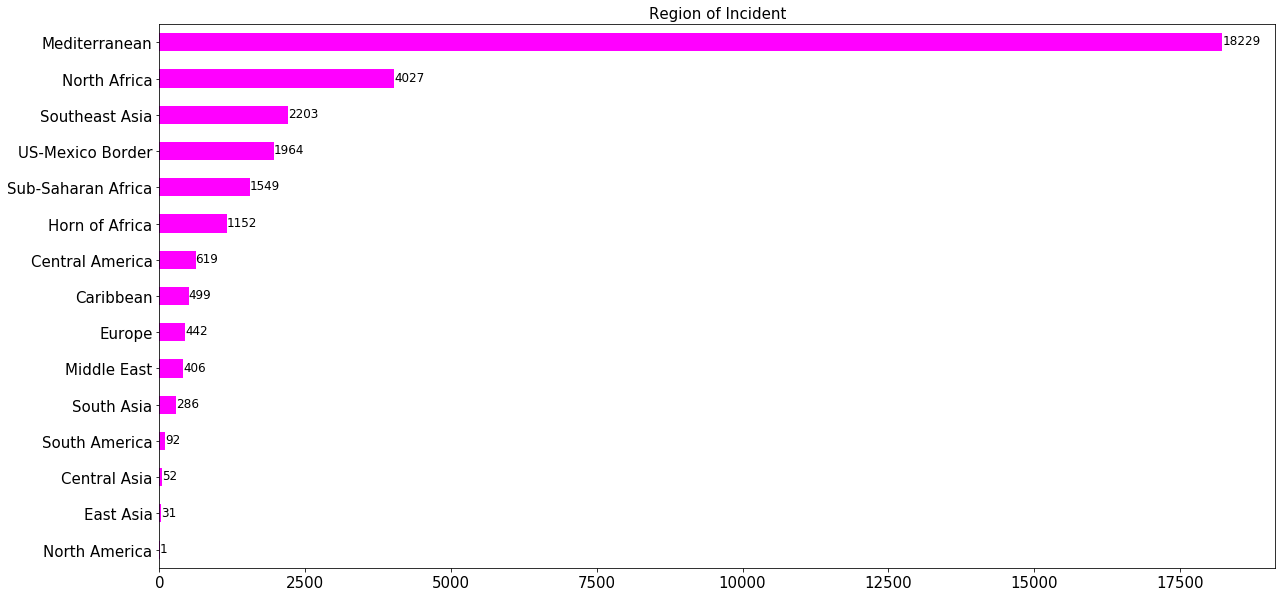

In [10]:

region_incident = Missing_Migrants.groupby(['Region of Incident'])['Total Dead and Missing'].sum().sort_values(ascending = False)

ax = region_incident.plot(kind='barh', figsize=(20, 10) ,color="magenta", fontsize=15);
plt.ylabel('');
ax.set_alpha(0.8)
ax.set_title("Region of Incident", fontsize=15)


# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
    

# invert for largest on top 
ax.invert_yaxis()                                          

It is seen that most of the accidents is taken place in Mediterranean borders and it is reasonable if we think that the people want to migrate the European countries. However, it is also observed that migrants can survive during the road but they had to face the most serious conditions when they have reached the final point.

#### Top Causes of Death

Let's first illustrate the top 10 cause of deaths in whole dataset.

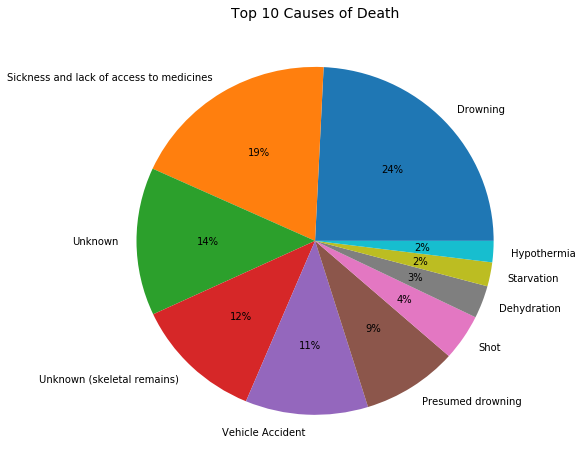

In [11]:
Missing_Migrants['Cause of Death'].value_counts().head(10).plot(kind = 'pie', figsize = (8,8), autopct='%1.0f%%')
plt.title('Top 10 Causes of Death', fontsize = 14)
plt.ylabel('');

From the Pie Chart, **Drowning and Sickness** are the most common reason behind missing and dead migrants life story. We can say that migrants choose to escape via seaway and most of the time it ended in a worse scenario. And, even if they can survive in the road, they have to face with the illness and try to rescue without any access to medicines.

It is seen that the **Unknown** has a huge percentage, 26%, and it is quite sad because it indicates that tough circumstances that migrants faced, even their body didnt identified. 